# 초기설정

In [1]:
a = '멀티캠퍼스 정규과정 파이썬과정'

In [2]:
b = a.replace(' ','.')
print(b)

멀티캠퍼스.정규과정.파이썬과정


In [3]:
a = '멀티캠퍼스 정규과정 파이썬과정'
a.split(' ')

['멀티캠퍼스', '정규과정', '파이썬과정']

In [4]:
#워드클라우드를 만드는 라이브러리
!pip install wordcloud
import wordcloud
wordcloud.__version__
#colab 환경을 만들기 위한 작업 (이해못해도 괜찮아요)

# 폰트설치 NanumBarunGothic
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 배민JUA체
!wget "http://pop.baemin.com/fonts/jua/BMJUA_ttf.ttf"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,336 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and dire

# 분석할 텍스트 복붙하기 &불용단어 업데이트


In [5]:
# 1. 분석할 텍스트 읽어오기
content = """
1박 2일정도 교육으로도 효과있는 프로그램이 있을까요
4차산업혁명시대 도래를 지나 조직의 필요성에 지배적인 변화를 빨리 앞당기는 것이 중요하여 DT의 필요성이 중요하다.
개별 부서에서 업무에 적용하여 output 도출을 원함
"겁네. 갈아 넣어야 해서 힘듭니다.
난 교육을 하러 왔는데 영상도 만들어야 하고, 촬영도 해야하고, 시나리오도 만들어야하고, 보고서도 써야하고.... 갈아 넣다가 갈아넣다가 일이 끝납니다.

회사에서 등대인 줄 알고 있습니다.

밤에 불이 꺼지지 않아요. "
교육 담당자로서 DT 관련하여 전사적으로 역략 향상이 필요하다고 생각하는데 경영진에 대한 설득이 어렵고, 경영진을 설득한다고 하더라도 직원들이 DT에 대한 필요성을 못느끼고 있는 듯합니다.
더 다양한 프로그래밍 언어 활용
선 분위기 조성 후 개인의 니즈반영 교육이 좋은것같음
솔루션을제공할수있는 교육이 필요함
없음
엑셀로 할 수 있는 DT 교육이 있으면 좋겠습니다.
인식의 전환이 필요하지만 아직 갈 길이 멀어 강사 인력 확대 필요
임직원들이 DT를 재미있게 시작할 수 있었음 좋겠습니다.
전사가 아닌 그 직무에 해당하는 사람들에게만 진행하는게 현실적임
좋은 교재와 강의가 필요합니다
지금과 다른, 무엇이 가능한지 구체적인 사례로 시작하면 좋겠습니다
현업에 바로 적용 가능한 수준의 교육 필요
dt교육은 다소 전문적이란 인식이 많기 때문에 저서와 같이 비전공자들도 쉽게 접근할 수 있다는 인식이 중요할 것 같네요
DT도 ESG도 플랫폼도…유행 중인데 그래서 우리 회사에서 해야되는 ‘실무’가 무엇인지 명확하게 제시할 수 있었으면 좋겠습니다. ‘DT교육/적용을 통한 현업 이슈 개선 BP 사례’도 보고 싶구요!
"""

In [6]:
#불용어 제거용 사전 구축
from wordcloud import WordCloud, STOPWORDS
stopword2 = "회사에서 교육이 좋겠습니다 큰 것 교육 되었습니다 강의 교육을 내용을 수업 있어 특히 통해 같습니다 모든 배울 대한 매우 굉장히 것을 배우는 덕분에 과정이 선생님들의 있었습니다 수업을 선생님들이 있는 과정을 많이 너무 정말 같습니다 생각합니다 을 를 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓"
stopword2 = set(stopword2.split(' '))
stopwords = set(STOPWORDS) | stopword2

## 문장형(기본워드크라우드)

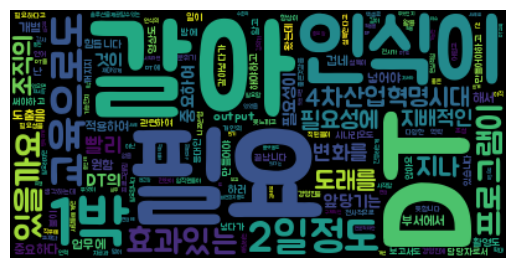

In [7]:
# !pip install uninstall Pillow
# !pip install Pillow==9.0.0


#워드크라우드를 만들자
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS
#불용단어를 추가할 수 있다. 기본적인 조사가 들어가 있지만 "교육" "같습니다" "내용을" 과 같은 실제 텍스트에 포함되어도 큰 의미가 없는 단어의 경우 추가하여 삭제할 수 있다. 방법은 아래의 문자열에 단어를 하나씩 추가해주는 것이다.

wc = WordCloud(font_path="BMJUA_ttf.ttf",stopwords=stopwords) #wc 변수에 wordcloud 객체지정
wc.generate(content)

plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
#맘에든다면  저장
wc.to_file('문장포함.png')

## 단어형 (konlp 활용)
(참고) https://mkjjo.github.io/python/2019/07/09/korean_preprocessing.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.2 MB/s eta 0:00:00
[('1', 'Number'), ('박', 'Noun'), ('2일', 'Number'), ('정도', 'Foreign'), ('교육', 'Noun'), ('으로도', 'Josa'), ('효과', 'Noun'), ('있는', 'Adjective'), ('프로그램', 'Noun'), ('이', 'Josa'), ('있을까요', 'Adjective'), ('4', 'Number'), ('차', 'Noun'), ('산업혁명', 'Noun'), ('시대', 'Noun'), ('도래', 'Noun'), ('를', 'Josa'), ('지나', 'Noun'), ('조직', 'Noun'), ('의', 'Josa'), ('필요성', 'Noun'), ('에', 'Josa'), ('지배', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('변화', 'Noun'), ('를', 'Josa'), ('빨리', 'Adverb'), ('앞당기는', 'Verb'), ('것', 'Noun'), ('이', 'Josa'), ('중요하여', 'Adjective'), ('DT', 'Alpha'), ('의', 'Noun'), ('필요성', 'Noun'), ('이', 'Josa'), ('중요하다', 'Adjective'), ('개별', 'Noun'), ('부서', 'Noun'), ('에서', 'Josa'), ('업무', 'Noun'), ('에', 'Josa'), ('적용', 'Noun'), ('하여', 'Verb'), ('output', 'Alpha'), ('도출', 'Noun'), ('을', 'Josa'), ('원함', 'Noun'), ('"', 'Punctuation'), ('겁', 'Noun'

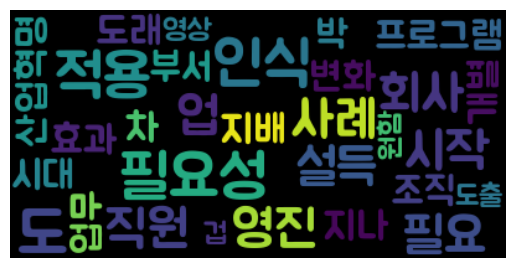

In [9]:
#2.불필요한 심볼없애기
filtered_content = content.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','')
# 3. 형태소 분석 및 단어 추출
!pip install konlpy
import konlpy.tag
Okt = konlpy.tag.Okt()
Okt_morphs = Okt.pos(filtered_content)  # 튜플반환
print(Okt_morphs)
komoran = konlpy.tag.Komoran()
komoran_morphs = komoran.pos(filtered_content)
print(komoran_morphs)
# 4. 명사만 추출하기
Noun_words = []
for word, pos in Okt_morphs:
    if pos == 'Noun':
        Noun_words.append(word)
print(Noun_words)



unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in Noun_words: Noun_words.remove(word)  # 최종결과 : Noun_words
        #6.빈도분석
from collections import Counter
c = Counter(Noun_words)
print(c.most_common(10)) # 상위 10개 출력하기

#7.워드크라우드 제작
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'BMJUA_ttf.ttf' # For Korean characters

noun_text = ''
for word in Noun_words:
    noun_text = noun_text +' '+word

# wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
# plt.figure()
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

#단어제거 max_words 단어수
wordcloud = WordCloud(max_font_size=50, max_words=30, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
#이미지 파일 저장 마음에 들경우 저장
wordcloud.to_file("단어위주.png")

# 원하는엑셀파일에서 텍스트를 추출하여 대량의 데이터를 만들

In [ ]:
#엑셀파일 열기
#원하는 과정명,텍스트로 리스트 제작하기
#반복문을 통하여 과정별 워드크라우드 제작하기

